<a href="https://colab.research.google.com/github/Jesica3018/APMKelompok6/blob/main/Decision_Tree_Algoritma_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn import tree 
from sklearn import datasets

In [6]:
 dataset=pd.read_csv('cosmetic_shop_dataset.csv') 
 print(dataset) 

    ID    Age  Income  Gender Marital_Status Buys
0    1    <21    High    Male         Single   No
1    2    <21    High    Male        Married   No
2    3  21-35    High    Male         Single  Yes
3    4    >35  Medium    Male         Single  Yes
4    5    >35     Low  Female         Single  Yes
5    6    >35     Low  Female        Married   No
6    7  21-35     Low  Female        Married  Yes
7    8    <21  Medium    Male         Single   No
8    9    <21     Low  Female        Married  Yes
9   10    >35  Medium  Female         Single  Yes
10  11    <21  Medium  Female        Married  Yes
11  12  21-35  Medium    Male        Married  Yes
12  13  21-35    High  Female         Single  Yes
13  14    >35  Medium    Male        Married   No


In [24]:
dataset=pd.DataFrame(data=dataset.iloc[:,0:6].values,columns=["ID","Age","Income","Gender","Marital_Status","Buys"]) 
filter = dataset["Age"]=="<21" 
dataset.where(filter).count() 
dataset_encoded=dataset.iloc[:,0:6] 
le=LabelEncoder() 
for i in dataset_encoded: dataset_encoded[i]=le.fit_transform(dataset_encoded[i]) 
print(dataset_encoded)

    ID  Age  Income  Gender  Marital_Status  Buys
0    0    1       0       1               1     0
1    1    1       0       1               0     0
2    2    0       0       1               1     1
3    3    2       2       1               1     1
4    4    2       1       0               1     1
5    5    2       1       0               0     0
6    6    0       1       0               0     1
7    7    1       2       1               1     0
8    8    1       1       0               0     1
9    9    2       2       0               1     1
10  10    1       2       0               0     1
11  11    0       2       1               0     1
12  12    0       0       0               1     1
13  13    2       2       1               0     0


In [25]:
X=dataset_encoded.iloc[:,1:5].values 
y=dataset_encoded.iloc[:,5].values 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1,random_state=2) 
model=DecisionTreeClassifier(criterion='gini') 
model.fit(X_train,y_train) 

if model.predict([[0,1,0,1]])==1: 
    print("Buy") 
else: 
    print("No") 

Buy


In [26]:
DT=DecisionTreeClassifier(random_state=12345) 
model = DT.fit(X, y) 
DT.fit(X_train,y_train)
predict=DT.predict(X_test)

[Text(0.4, 0.9, 'Income <= 0.5\ngini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(0.2, 0.7, 'ID <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3, 0.5, 'Gender <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.7, 'ID <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7, 0.5, 'ID <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.3, 'Gender <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

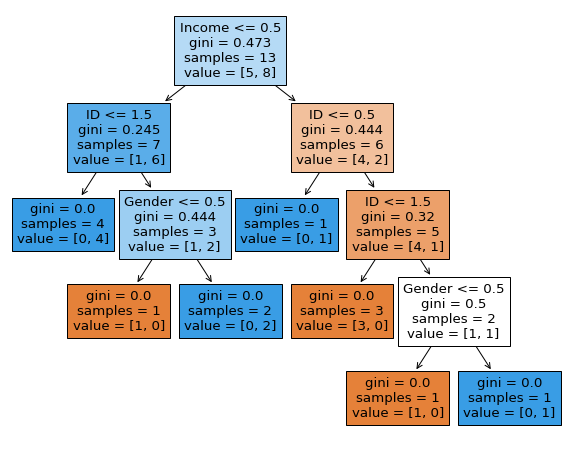

In [29]:
plt.figure(figsize=(10,8))
feature_names=['ID','Age','Income','Gender','Marital_Status']
tree.plot_tree(DT,feature_names=feature_names,filled=True)